In [10]:
#INITIALIZATION
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

#testing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import StandardScaler

#DATASET
class_data = pd.read_csv('/Users/asamc/Documents/BMEN415/classification.csv')
#Had to convert to binary for the PLS Model only!
class_data['diagnosis'] = class_data['diagnosis'].replace('B', 0)
class_data['diagnosis'] = class_data['diagnosis'].replace('M', 1)

class_data

#assigning features to x and target to y
X = class_data.drop(['diagnosis'], axis=1)
y = class_data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55) 

LDA Training Accuracy: 0.9648351648351648
LDA Testing Accuracy: 0.9649122807017544


<AxesSubplot:>

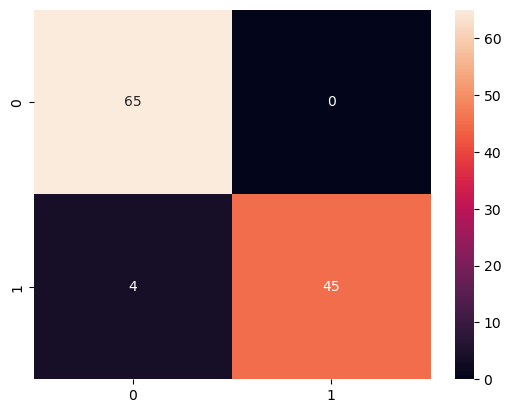

In [7]:
#LINEAR DISCRIMINANT ANALYSIS 
lda = LinearDiscriminantAnalysis().fit(X,y)
#lda.fit(X_train, y_train)

y_pred_test = lda.predict(X_test)
y_pred_train = lda.predict(X_train)

#ACCURACY
accuracy_train = lda.score(X_train, y_train) 
print('LDA Training Accuracy:', accuracy_train)
accuracy_test = lda.score(X_test, y_test) 
print('LDA Testing Accuracy:', accuracy_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

Penalized Elastic Training Accuracy: 0.8857142857142857
Penalized Elastic Testing Accuracy: 0.9385964912280702


C:\Users\asamc\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\asamc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\asamc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\asamc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\asamc\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<AxesSubplot:>

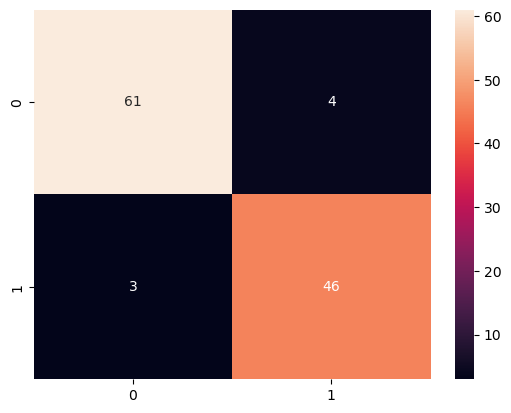

In [8]:
#PENALIZED ELASTIC MODEL 
p_elas = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, C=10, solver='saga', max_iter=10000, class_weight = 'balanced')

p_elas.fit(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_pred_test = p_elas.predict(X_test_scaled) 
y_pred_train = p_elas.predict(X_train_scaled)
 
#ACCURACY
accuracy_train = p_elas.score(X_train_scaled, y_train) 
print('Penalized Elastic Training Accuracy:', accuracy_train)

accuracy_test = p_elas.score(X_test_scaled, y_test) 
print('Penalized Elastic Testing Accuracy:', accuracy_test)

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

PLS Classification Training Accuracy: 0.9714285714285714
PLS Classification Testing Accuracy: 0.9824561403508771


<AxesSubplot:>

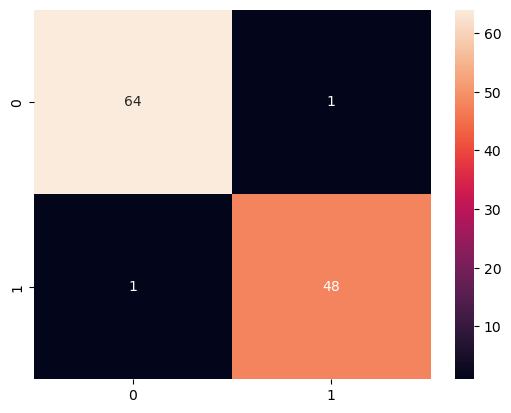

In [9]:
#PARTIAL LEAST SQUARES CLASSIFICATION 

pls_c = PLSRegression(n_components=2)
pls_c.fit(X_train, y_train)

X_train_pls = pls_c.transform(X_train)
X_test_pls = pls_c.transform(X_test)

cls = LogisticRegression()
cls.fit(X_train_pls, y_train)

y_pred_train = cls.predict(X_train_pls)
y_pred_test = cls.predict(X_test_pls)

#ACCURACY
accuracy_train = cls.score(X_train_pls, y_train) 
print('PLS Classification Training Accuracy:', accuracy_train)
accuracy_test = cls.score(X_test_pls, y_test) 
print('PLS Classification Testing Accuracy:', accuracy_test)

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)